<a href="https://colab.research.google.com/github/vloganb/trabajoml/blob/main/Trabajo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance Codigo Trabajo Final



Entrega avances en procesamiento de datos, descripción de variables y EDA 

# Preparación de los datos
Se comienza juntando las bases de datos recopiladas. Estas son:


*   IPSA: contiene datos diarios del índice bursátil nacional junto con estadística descriptiva
*   Índices: contiene los índices bursátiles de **PONER ACÁ PAÍSES QUE DEJAREMOS**



In [36]:
#Librería que filtra warnings innecesarios, por ej que una función será deprecated (como distplot)
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Como los archivos están en un repositorio, se clona para traerlo al colab
!git clone https://github.com/vloganb/trabajoml

fatal: destination path 'trabajoml' already exists and is not an empty directory.


In [21]:
import pandas as pd
# Importamos los archivos
ipsa_path = 'trabajoml/IPSA.csv'
final_ipsa_path = 'trabajoml/IPSA_FINAL.csv'
bursatil_path = 'trabajoml/INDICES.xlsx'

# El archivo de IPSA tiene un separador de la forma ,""
# Tenemos que cambiarlo a ; y quitar todos los " extra
with open(ipsa_path) as f:
    lines = f.readlines()
    lines = [line.replace(',""', ';') for line in lines]
    lines = [line.replace('"', '') for line in lines]
    with open(final_ipsa_path, 'w') as f2:
        f2.writelines(lines)
ipsa_df = pd.read_csv(final_ipsa_path, sep=';')

# El archivo de índices bursátiles es un excel
bursatil_df = pd.read_excel(bursatil_path)

In [22]:
ipsa_df.head()
# Se observa que contiene
# Fecha, precio promedio durante el día, precio de apertura
# Precio más alto, precio más bajo, volumen y cambio en precio (%)
# En este caso, nos interesa la variable de precio ('Price')

,Date,Price,Open,High,Low,Vol.,Change %
0,04/18/2023,"5,474.62","5,469.94","5,492.36","5,458.96",NaN,0.09%
1,04/17/2023,"5,469.94","5,417.18","5,474.76","5,417.18",NaN,0.97%
2,04/14/2023,"5,417.18","5,365.12","5,423.43","5,365.12",NaN,1.43%
3,04/13/2023,"5,341.03","5,353.09","5,357.60","5,334.51",NaN,-0.23%
4,04/12/2023,"5,353.09","5,306.88","5,363.56","5,306.88",NaN,0.87%


In [23]:
bursatil_df.head()
# Miramos los índices bursátiles que tenemos

,Periodo,"1.Dow Jones, EE.UU.","2.Nasdaq, EE.UU.","3.FTSE100, Reino Unido","4.Nikkei, Japón","5.CAC40, Francia","6.DAX, Alemania","7.KOSPI, Corea del Sur.","8.CSI 300, China.","9.FTSE Bursa Malaysia KLCI, Malasia.","10.WIG, Polonia.","11.MOEX Rusia, Rusia.","12.Bangkok SET, Tailandia.","13.TWSE, Taiwán, Provincia de China.","14.BIST, Turquía.","15.MERVAL, Argentina.","16.IBOVESPA, Brasil.","17.COLCAP, Colombia.","18.S&P/BMV IPC , México.","19.IGBVL, Perú."
0,1990-01-02,2810.15,459.33,2434.1,NaN,1988.85,1814.38,NaN,NaN,571.86,NaN,NaN,899.61,NaN,0.23,NaN,0.0,NaN,NaN,0.35
1,1990-01-03,2809.73,460.90,2463.7,NaN,1979.89,1869.66,908.59,NaN,582.67,NaN,NaN,897.34,9624.18,0.24,NaN,0.0,NaN,NaN,0.36
2,1990-01-04,2796.08,459.39,2451.6,38712.88,2006.42,1835.88,928.82,NaN,586.05,NaN,NaN,902.07,9853.15,0.25,NaN,0.0,NaN,NaN,0.37
3,1990-01-05,2773.25,458.22,2444.5,38274.76,1994.36,1820.00,915.11,NaN,582.56,NaN,NaN,918.67,9862.42,0.25,NaN,0.0,NaN,NaN,0.38
4,1990-01-08,2794.37,458.71,2431.3,38294.96,1968.95,1843.24,919.46,NaN,583.45,NaN,NaN,906.71,9964.72,0.25,17.48,0.0,NaN,NaN,0.37


In [24]:
# Definimos que ambas bases tienen la columna de fecha en formato datetime
ipsa_df['Date'] = pd.to_datetime(ipsa_df['Date'], format='%m/%d/%Y')
bursatil_df['Periodo'] = pd.to_datetime(bursatil_df['Periodo'], format='%Y-%m-%d')

# Hacemos que el formato datetime sea igual en ambos df (dd/mm/yyyy)
ipsa_df['Date'] = ipsa_df['Date'].dt.strftime('%d/%m/%Y')
bursatil_df['Periodo'] = bursatil_df['Periodo'].dt.strftime('%d/%m/%Y')

In [25]:
# Unimos ambos df en uno que usaremos en el trabajo
df = pd.merge(bursatil_df, ipsa_df, left_on='Periodo', right_on='Date')
df

,Periodo,"1.Dow Jones, EE.UU.","2.Nasdaq, EE.UU.","3.FTSE100, Reino Unido","4.Nikkei, Japón","5.CAC40, Francia","6.DAX, Alemania","7.KOSPI, Corea del Sur.","8.CSI 300, China.","9.FTSE Bursa Malaysia KLCI, Malasia.","10.WIG, Polonia.","11.MOEX Rusia, Rusia.","12.Bangkok SET, Tailandia.","13.TWSE, Taiwán, Provincia de China.","14.BIST, Turquía.","15.MERVAL, Argentina.","16.IBOVESPA, Brasil.","17.COLCAP, Colombia.","18.S&P/BMV IPC , México.","19.IGBVL, Perú.",Date,Price,Open,High,Low,Vol.,Change %
0,19/01/2000,11489.37,4151.29,6445.40,18897.75,5649.46,7091.04,938.78,NaN,933.38,19632.30,200.66,486.33,9151.44,184.14,581.52,17470.20,NaN,7171.20,1898.12,19/01/2000,"1,210.84","1,217.49","1,217.49","1,210.84",NaN,-0.47%
1,20/01/2000,11351.30,4189.51,6348.70,19008.01,5709.74,7112.66,945.90,NaN,950.86,19966.80,206.61,486.64,9136.95,180.31,578.77,17176.70,NaN,7036.79,1861.27,20/01/2000,"1,210.73","1,210.85","1,210.85","1,209.07",NaN,-0.01%
2,21/01/2000,11251.72,4235.40,6346.30,18878.09,5681.32,6992.75,925.16,NaN,953.96,19905.70,215.77,478.92,9255.94,172.58,570.00,17034.20,NaN,6890.78,1847.29,21/01/2000,"1,208.25","1,210.96","1,210.96","1,205.77",NaN,-0.20%
3,24/01/2000,11008.17,4096.08,6379.80,19056.71,5690.86,6931.99,926.77,NaN,954.50,20085.80,210.82,477.22,9387.07,176.64,568.17,16971.70,NaN,6855.35,1838.89,24/01/2000,"1,180.68","1,208.38","1,208.38","1,180.68",NaN,-2.28%
4,25/01/2000,11029.89,4167.41,6274.10,18895.53,5597.50,6809.64,891.22,NaN,952.06,19354.50,198.65,473.22,9372.37,172.19,563.50,NaN,NaN,6885.88,1806.29,25/01/2000,"1,166.50","1,180.80","1,180.80","1,162.72",NaN,-1.20%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,12/04/2023,33646.50,11929.34,7824.84,28082.70,7396.94,15703.60,2550.64,4097.29,1434.74,60262.50,2538.47,1592.67,15932.97,5146.11,266850.00,106889.71,1232.20,54333.12,22283.32,12/04/2023,"5,353.09","5,306.88","5,363.56","5,306.88",NaN,0.87%
5790,13/04/2023,34029.69,12166.27,7843.38,28156.97,7480.83,15729.46,2561.66,4068.98,1434.22,60938.85,2544.28,NaN,15804.76,5135.55,270329.00,106457.85,1240.27,54695.78,22456.33,13/04/2023,"5,341.03","5,353.09","5,357.60","5,334.51",NaN,-0.23%
5791,14/04/2023,33886.47,12123.47,7871.91,28493.47,7519.61,15807.50,2571.49,4092.00,1435.13,61293.06,2554.85,NaN,15929.43,5092.88,275717.40,106279.37,1253.29,54460.05,22477.45,14/04/2023,"5,417.18","5,365.12","5,423.43","5,365.12",NaN,1.43%
5792,17/04/2023,33987.18,12157.72,7879.51,28514.78,7498.18,15789.53,2575.91,4149.38,1434.90,61656.26,2596.11,1600.41,15963.55,5059.35,281295.30,106015.67,1257.24,54778.93,22394.93,17/04/2023,"5,469.94","5,417.18","5,474.76","5,417.18",NaN,0.97%


In [26]:
# Eliminamos las variables que tenía la base IPSA que no nos interesan
df = df.drop(['Date', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
# Renombramos IPSA para identificarla entre todos los otros índices bursátiles
df = df.rename(columns={'Price': 'IPSA, Chile.'})

In [27]:
pd.options.display.max_columns = 0
df

,Periodo,"1.Dow Jones, EE.UU.","2.Nasdaq, EE.UU.","3.FTSE100, Reino Unido","4.Nikkei, Japón","5.CAC40, Francia","6.DAX, Alemania","7.KOSPI, Corea del Sur.","8.CSI 300, China.","9.FTSE Bursa Malaysia KLCI, Malasia.","10.WIG, Polonia.","11.MOEX Rusia, Rusia.","12.Bangkok SET, Tailandia.","13.TWSE, Taiwán, Provincia de China.","14.BIST, Turquía.","15.MERVAL, Argentina.","16.IBOVESPA, Brasil.","17.COLCAP, Colombia.","18.S&P/BMV IPC , México.","19.IGBVL, Perú.","IPSA, Chile."
0,19/01/2000,11489.37,4151.29,6445.40,18897.75,5649.46,7091.04,938.78,NaN,933.38,19632.30,200.66,486.33,9151.44,184.14,581.52,17470.20,NaN,7171.20,1898.12,"1,210.84"
1,20/01/2000,11351.30,4189.51,6348.70,19008.01,5709.74,7112.66,945.90,NaN,950.86,19966.80,206.61,486.64,9136.95,180.31,578.77,17176.70,NaN,7036.79,1861.27,"1,210.73"
2,21/01/2000,11251.72,4235.40,6346.30,18878.09,5681.32,6992.75,925.16,NaN,953.96,19905.70,215.77,478.92,9255.94,172.58,570.00,17034.20,NaN,6890.78,1847.29,"1,208.25"
3,24/01/2000,11008.17,4096.08,6379.80,19056.71,5690.86,6931.99,926.77,NaN,954.50,20085.80,210.82,477.22,9387.07,176.64,568.17,16971.70,NaN,6855.35,1838.89,"1,180.68"
4,25/01/2000,11029.89,4167.41,6274.10,18895.53,5597.50,6809.64,891.22,NaN,952.06,19354.50,198.65,473.22,9372.37,172.19,563.50,NaN,NaN,6885.88,1806.29,"1,166.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,12/04/2023,33646.50,11929.34,7824.84,28082.70,7396.94,15703.60,2550.64,4097.29,1434.74,60262.50,2538.47,1592.67,15932.97,5146.11,266850.00,106889.71,1232.20,54333.12,22283.32,"5,353.09"
5790,13/04/2023,34029.69,12166.27,7843.38,28156.97,7480.83,15729.46,2561.66,4068.98,1434.22,60938.85,2544.28,NaN,15804.76,5135.55,270329.00,106457.85,1240.27,54695.78,22456.33,"5,341.03"
5791,14/04/2023,33886.47,12123.47,7871.91,28493.47,7519.61,15807.50,2571.49,4092.00,1435.13,61293.06,2554.85,NaN,15929.43,5092.88,275717.40,106279.37,1253.29,54460.05,22477.45,"5,417.18"
5792,17/04/2023,33987.18,12157.72,7879.51,28514.78,7498.18,15789.53,2575.91,4149.38,1434.90,61656.26,2596.11,1600.41,15963.55,5059.35,281295.30,106015.67,1257.24,54778.93,22394.93,"5,469.94"


# EDA
A continuación se realizará el análisis exploratorio de datos.

In [28]:
# Observamos los primeros y últimos datos de nuestro dataset
pd.options.display.max_columns = 0
df

,Periodo,"1.Dow Jones, EE.UU.","2.Nasdaq, EE.UU.","3.FTSE100, Reino Unido","4.Nikkei, Japón","5.CAC40, Francia","6.DAX, Alemania","7.KOSPI, Corea del Sur.","8.CSI 300, China.","9.FTSE Bursa Malaysia KLCI, Malasia.","10.WIG, Polonia.","11.MOEX Rusia, Rusia.","12.Bangkok SET, Tailandia.","13.TWSE, Taiwán, Provincia de China.","14.BIST, Turquía.","15.MERVAL, Argentina.","16.IBOVESPA, Brasil.","17.COLCAP, Colombia.","18.S&P/BMV IPC , México.","19.IGBVL, Perú.","IPSA, Chile."
0,19/01/2000,11489.37,4151.29,6445.40,18897.75,5649.46,7091.04,938.78,NaN,933.38,19632.30,200.66,486.33,9151.44,184.14,581.52,17470.20,NaN,7171.20,1898.12,"1,210.84"
1,20/01/2000,11351.30,4189.51,6348.70,19008.01,5709.74,7112.66,945.90,NaN,950.86,19966.80,206.61,486.64,9136.95,180.31,578.77,17176.70,NaN,7036.79,1861.27,"1,210.73"
2,21/01/2000,11251.72,4235.40,6346.30,18878.09,5681.32,6992.75,925.16,NaN,953.96,19905.70,215.77,478.92,9255.94,172.58,570.00,17034.20,NaN,6890.78,1847.29,"1,208.25"
3,24/01/2000,11008.17,4096.08,6379.80,19056.71,5690.86,6931.99,926.77,NaN,954.50,20085.80,210.82,477.22,9387.07,176.64,568.17,16971.70,NaN,6855.35,1838.89,"1,180.68"
4,25/01/2000,11029.89,4167.41,6274.10,18895.53,5597.50,6809.64,891.22,NaN,952.06,19354.50,198.65,473.22,9372.37,172.19,563.50,NaN,NaN,6885.88,1806.29,"1,166.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,12/04/2023,33646.50,11929.34,7824.84,28082.70,7396.94,15703.60,2550.64,4097.29,1434.74,60262.50,2538.47,1592.67,15932.97,5146.11,266850.00,106889.71,1232.20,54333.12,22283.32,"5,353.09"
5790,13/04/2023,34029.69,12166.27,7843.38,28156.97,7480.83,15729.46,2561.66,4068.98,1434.22,60938.85,2544.28,NaN,15804.76,5135.55,270329.00,106457.85,1240.27,54695.78,22456.33,"5,341.03"
5791,14/04/2023,33886.47,12123.47,7871.91,28493.47,7519.61,15807.50,2571.49,4092.00,1435.13,61293.06,2554.85,NaN,15929.43,5092.88,275717.40,106279.37,1253.29,54460.05,22477.45,"5,417.18"
5792,17/04/2023,33987.18,12157.72,7879.51,28514.78,7498.18,15789.53,2575.91,4149.38,1434.90,61656.26,2596.11,1600.41,15963.55,5059.35,281295.30,106015.67,1257.24,54778.93,22394.93,"5,469.94"


In [29]:
########################## ESTO ES DE LA TAREA 1, CAMBIAR ############################################################
# .info nos muestra las características más generales del dataframe.
# Muestra: la cantidad de filas (1599), la cantidad de columnas (16)
# Dentro de cada variable cuántas observaciones no faltantes hay, y qué tipo de dato contienen las variables (object o float 64, en este caso)
# Finalmente, muestra un resumen de los tipos de datos dentro del df y cuántas variables corresponden a cada una
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5794 entries, 0 to 5793
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Periodo                               5794 non-null   object 
 1   1.Dow Jones, EE.UU.                   5632 non-null   float64
 2   2.Nasdaq, EE.UU.                      5632 non-null   float64
 3   3.FTSE100, Reino Unido                5661 non-null   float64
 4   4.Nikkei, Japón                       5485 non-null   float64
 5   5.CAC40, Francia                      5746 non-null   float64
 6   6.DAX, Alemania                       5719 non-null   float64
 7   7.KOSPI, Corea del Sur.               5555 non-null   float64
 8   8.CSI 300, China.                     4952 non-null   float64
 9   9.FTSE Bursa Malaysia KLCI, Malasia.  5501 non-null   float64
 10  10.WIG, Polonia.                      5661 non-null   float64
 11  11.MOEX Rusia, Ru

In [31]:
# .describe que nos entrega las principales estadísticas descriptivas para cada variable numérica
# Las cuenta, saca su media y desviación estándar, el mínimo, el máximo y los cuartiles
df.describe()

,"1.Dow Jones, EE.UU.","2.Nasdaq, EE.UU.","3.FTSE100, Reino Unido","4.Nikkei, Japón","5.CAC40, Francia","6.DAX, Alemania","7.KOSPI, Corea del Sur.","8.CSI 300, China.","9.FTSE Bursa Malaysia KLCI, Malasia.","10.WIG, Polonia.","11.MOEX Rusia, Rusia.","12.Bangkok SET, Tailandia.","13.TWSE, Taiwán, Provincia de China.","14.BIST, Turquía.","15.MERVAL, Argentina.","16.IBOVESPA, Brasil.","17.COLCAP, Colombia.","18.S&P/BMV IPC , México.","19.IGBVL, Perú."
count,5632.000000,5632.000000,5661.000000,5485.000000,5746.000000,5719.000000,5555.000000,4952.000000,5501.000000,5661.000000,5551.00000,5465.000000,5488.000000,5582.000000,5533.000000,5574.000000,4939.000000,5650.000000,5656.000000
mean,16486.229963,4695.696645,6029.196827,15928.014545,4666.485804,8347.765723,1701.172554,2927.201177,1320.695181,42569.250246,1538.47223,1051.214935,8708.368409,760.840156,18781.508260,56217.146710,1202.024321,31351.010087,13182.261628
std,7856.586143,3597.499895,1041.369358,5982.157074,1075.370688,3551.472792,667.860598,1245.710130,395.862104,16056.075655,910.50310,483.166513,3169.532246,811.112792,37544.507039,30956.575509,458.489325,15661.171093,7442.593602
min,6547.050000,1114.110000,3287.000000,7054.980000,2403.040000,2202.960000,468.760000,818.030000,553.340000,11564.580000,130.96000,250.600000,3446.260000,71.600000,200.860000,8370.900000,135.230000,5081.920000,1109.890000
25%,10539.047500,2153.202500,5315.500000,10620.550000,3782.622500,5613.310000,1124.965000,2101.285000,911.690000,27976.810000,697.57000,666.430000,6432.502500,276.695000,1411.280000,30903.675000,970.140000,15931.385000,4981.700000
50%,12872.895000,2969.160000,6117.600000,15171.810000,4540.960000,7309.130000,1900.010000,3100.085000,1466.890000,46400.670000,1497.81000,1040.830000,8183.380000,617.690000,2610.030000,54875.100000,1321.650000,36406.030000,15346.445000
75%,21120.720000,6189.253000,6829.000000,20020.040000,5427.507500,11550.465000,2085.525000,3836.732500,1649.330000,55271.630000,2051.94000,1541.300000,9845.380000,909.027500,21310.370000,70381.550000,1554.370000,44480.775000,19712.637500
max,36799.650000,16057.440000,8014.310000,30670.100000,7547.260000,16271.750000,3305.210000,5877.200000,1895.180000,74813.240000,4287.52000,1838.960000,18526.350000,5626.570000,281295.300000,130776.300000,1942.370000,56609.540000,25642.580000


In [32]:
#Revisión de columnas con missings de esta forma vemos sólo los NaN
df.isnull().sum()

Periodo                                   0
1.Dow Jones, EE.UU.                     162
2.Nasdaq, EE.UU.                        162
3.FTSE100, Reino Unido                  133
4.Nikkei, Japón                         309
5.CAC40, Francia                         48
6.DAX, Alemania                          75
7.KOSPI, Corea del Sur.                 239
8.CSI 300, China.                       842
9.FTSE Bursa Malaysia KLCI, Malasia.    293
10.WIG, Polonia.                        133
11.MOEX Rusia, Rusia.                   243
12.Bangkok SET, Tailandia.              329
13.TWSE, Taiwán, Provincia de China.    306
14.BIST, Turquía.                       212
15.MERVAL, Argentina.                   261
16.IBOVESPA, Brasil.                    220
17.COLCAP, Colombia.                    855
18.S&P/BMV IPC , México.                144
19.IGBVL, Perú.                         138
IPSA, Chile.                              0
dtype: int64

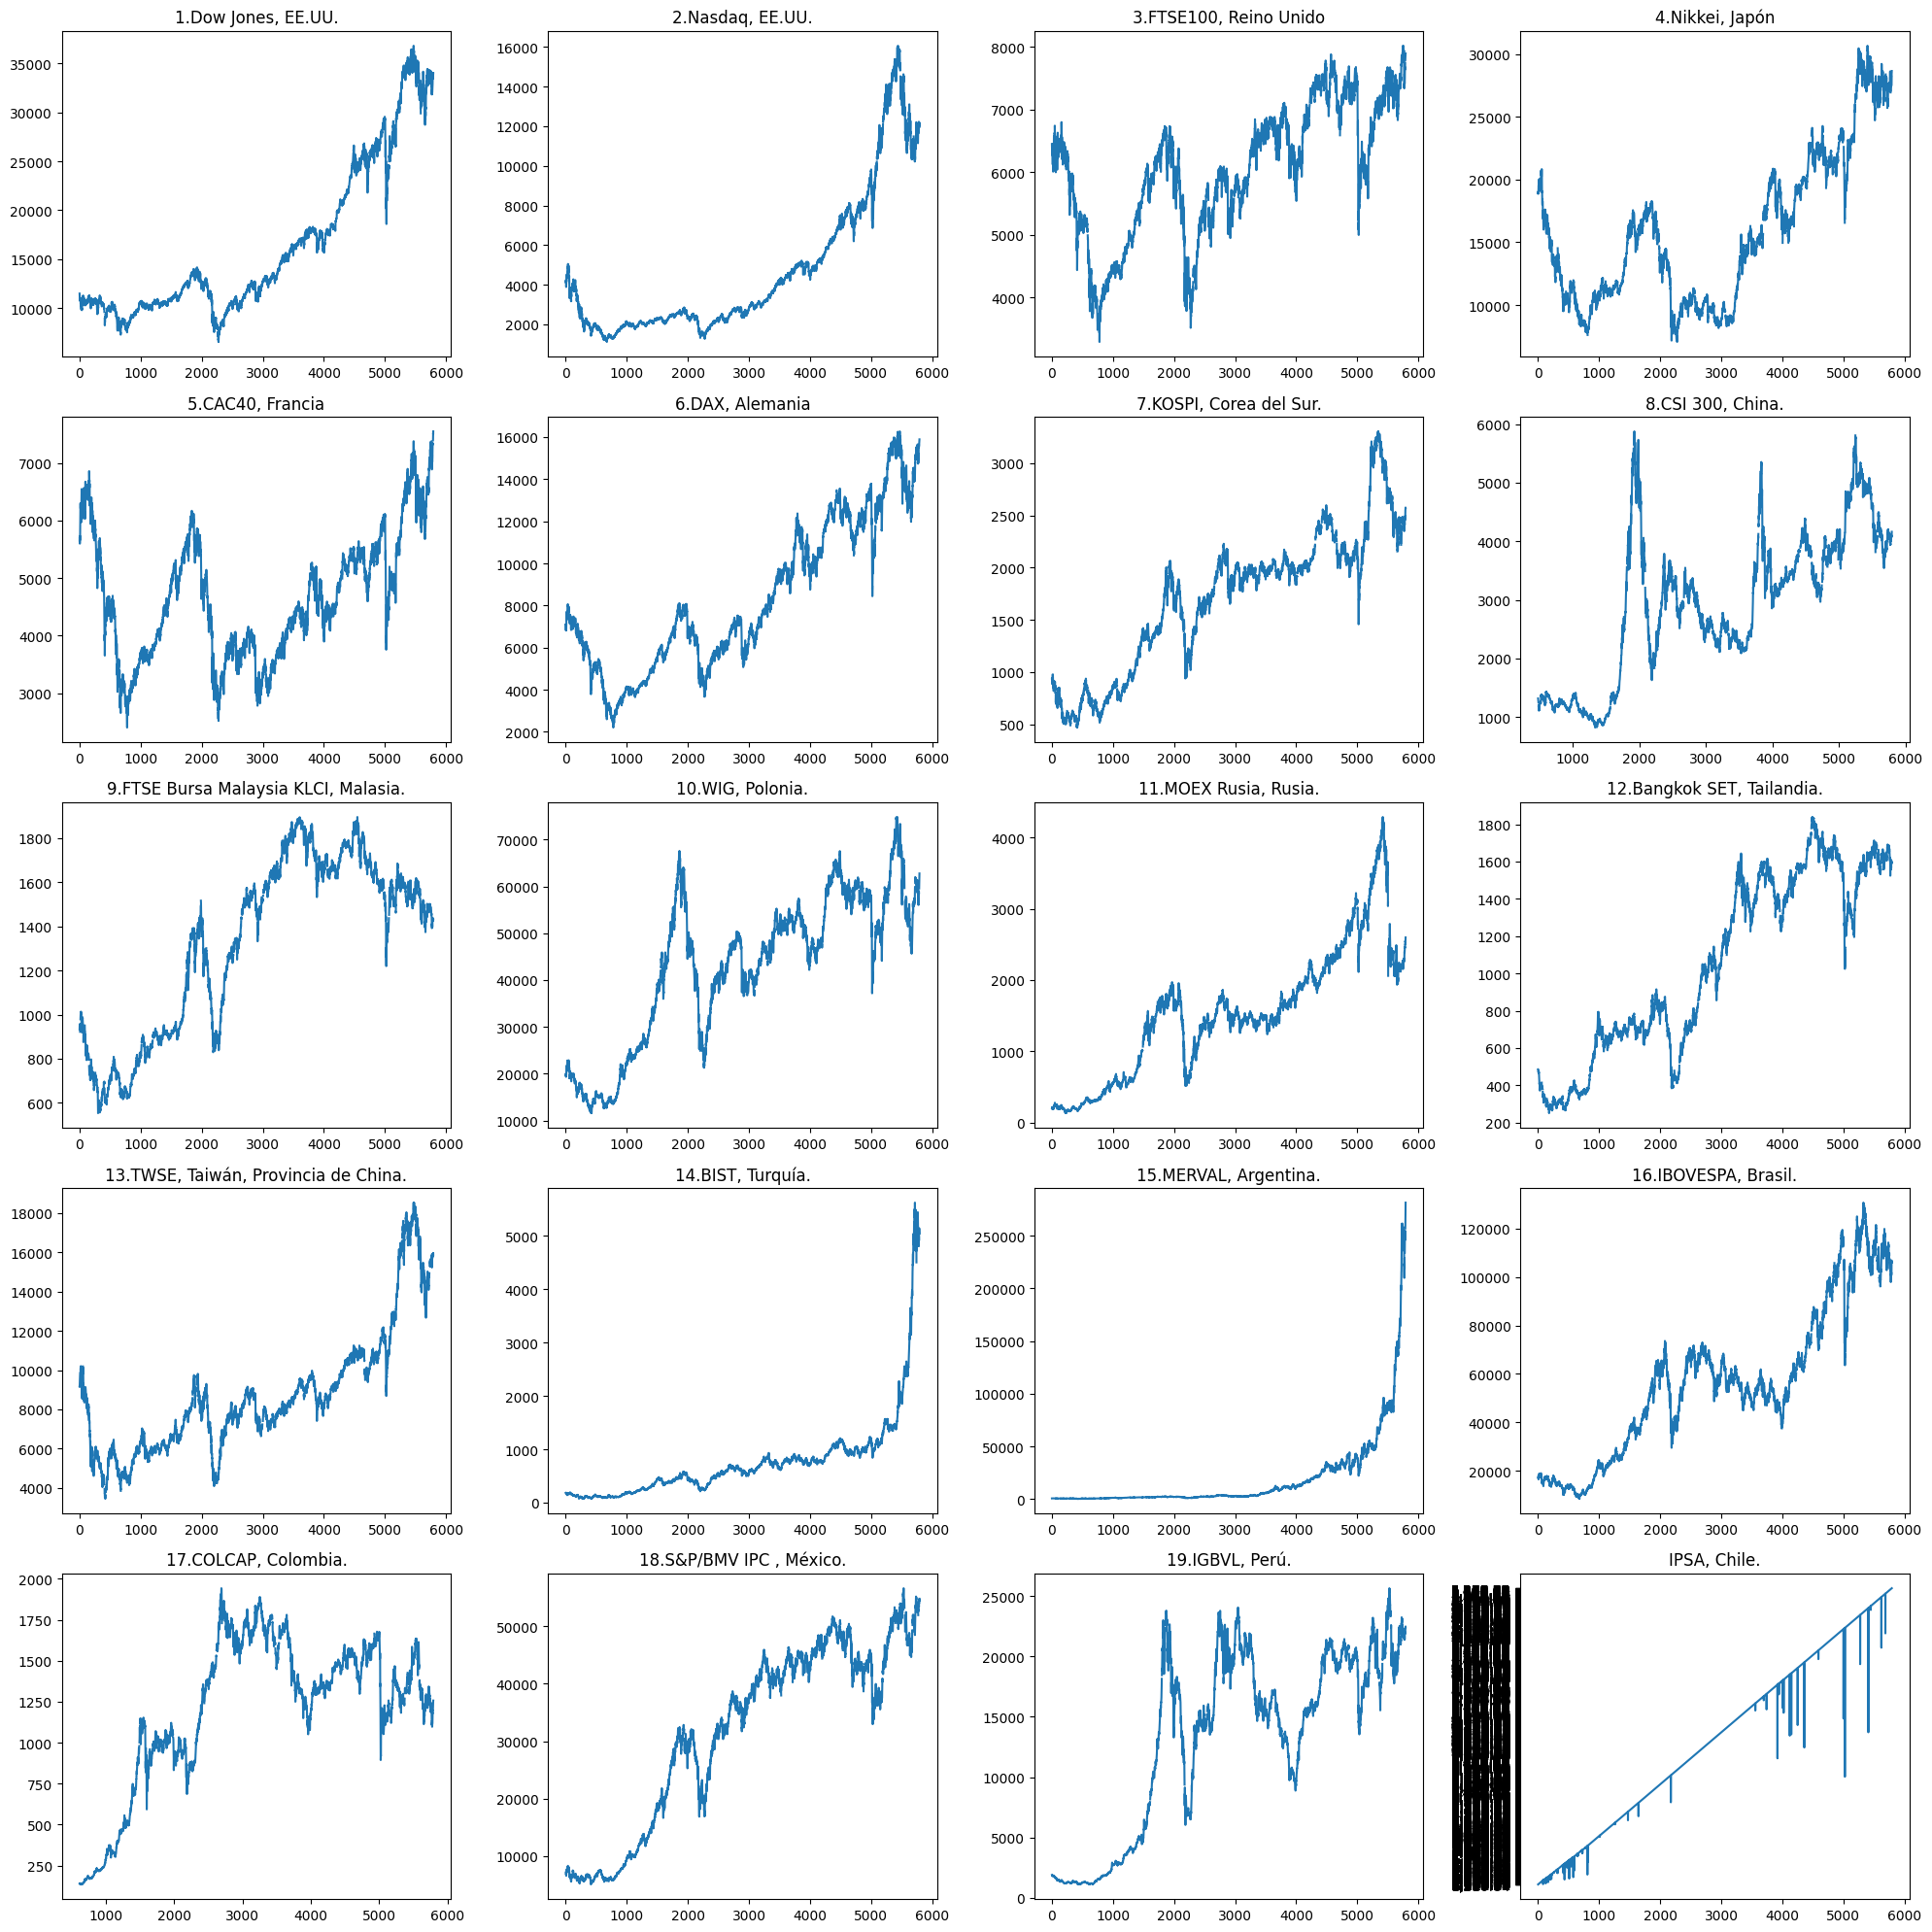

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 4
num_rows = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

feat_list = ['1.Dow Jones, EE.UU.', '2.Nasdaq, EE.UU.', '3.FTSE100, Reino Unido', '4.Nikkei, Japón',
             '5.CAC40, Francia', '6.DAX, Alemania', '7.KOSPI, Corea del Sur.', '8.CSI 300, China.',
             '9.FTSE Bursa Malaysia KLCI, Malasia.', '10.WIG, Polonia.', '11.MOEX Rusia, Rusia.', '12.Bangkok SET, Tailandia.',
             '13.TWSE, Taiwán, Provincia de China.', '14.BIST, Turquía.', '15.MERVAL, Argentina.', '16.IBOVESPA, Brasil.',
             '17.COLCAP, Colombia.', '18.S&P/BMV IPC , México.', '19.IGBVL, Perú.', 'IPSA, Chile.']

for i, feat in enumerate(feat_list):
    row = i // num_cols
    col = i % num_cols
    axs[row][col].plot(df.index, df[feat])
    axs[row][col].set_title(feat)

plt.tight_layout()
plt.show()
